# Stats Basics

* Seaborn: https://seaborn.pydata.org/tutorial/distributions.html?highlight=histogram

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 8)
# mpl.rcParams["figure.dpi"] = dpi
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)

font_size=15
title_font_size=25

In [5]:
import pandas as pd
print(pd.__version__)

1.4.2


# Normal Distribution

In [6]:
# Normal distribution
# https://www.youtube.com/watch?v=6YDHBFVIvIs

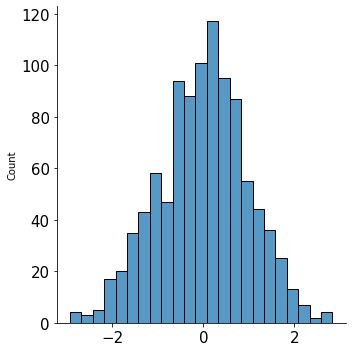

In [7]:
import numpy as np
import seaborn as sns

n = 1000
x = np.random.normal(loc=0, scale=1.0, size=1000)
sns.displot(x)

In [8]:
x.mean(), x.std(), x.var(), np.sqrt(x.var())

(-0.0031344649196249214,
 0.9776961339506542,
 0.9558897303420556,
 0.9776961339506542)

# Mean / Standard Deviation

In [9]:
sum = 0
for i in x:
    sum += i
mean = sum / len(x)
mean

-0.0031344649196249613

In [10]:
sum_of_squares = 0
# mean = x.mean()
for i in x:
    sum_of_squares += (i - mean) ** 2
var = sum_of_squares / len(x)
std = np.sqrt(var)
var, std

(0.9558897303420559, 0.9776961339506544)

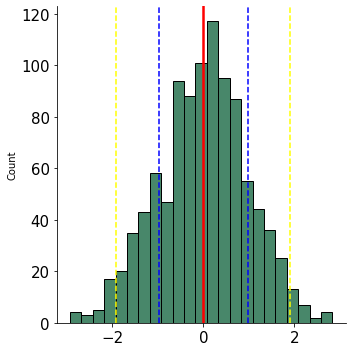

In [11]:
sns.displot(x, color='#0a5f38')
plt.axvline(x=x.mean(),
            color='red', 
            lw=2.5)
plt.axvline(x=x.mean() + x.std(),
            color='blue',
            ls='--')
plt.axvline(x=x.mean() - x.std(),
            color='blue',
            ls='--')

plt.axvline(x=x.mean() + 1.96 * x.std(),
            color='yellow',
            ls='--')
plt.axvline(x=x.mean() - 1.96 * x.std(),
            color='yellow',
            ls='--')

In [12]:
# how many values within 1 std
((x < x.mean() + x.std()) & (x > x.mean() - x.std())).astype(int).sum() / n

0.675

In [13]:
# assuming a normal distribution 95% of the data are within that range
# https://en.wikipedia.org/wiki/97.5th_percentile_point
((x < x.mean() + 1.96 * x.std()) & (x > x.mean() - 1.96 * x.std())).astype(int).sum() / n

0.954

# Non normal

In [14]:
from sklearn.datasets import fetch_openml


In [15]:
data = fetch_openml(name='BNG(cpu_small)', version=1)
df = data.frame
feature_1 = df.scall


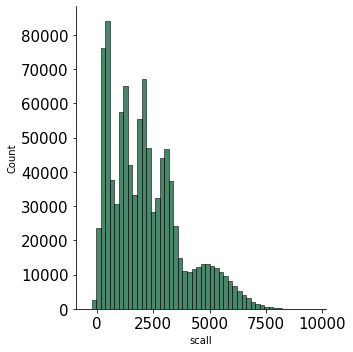

In [16]:
import seaborn as sns
g = sns.displot(feature_1, bins=50, color='#0a5f38');


In [17]:
# sns.displot?

In [18]:
feature_1.describe()

count    1000000.000000
mean        2197.510794
std         1600.845221
min         -428.346875
25%          959.123898
50%         1963.519604
75%         3090.565627
max         9635.260484
Name: scall, dtype: float64

In [19]:
feature_1.median()

1963.519604

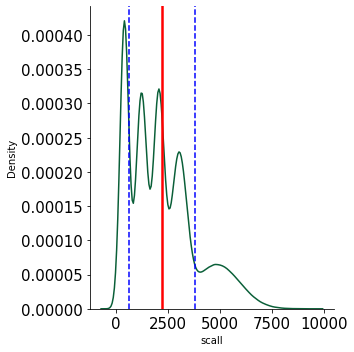

In [20]:
import seaborn as sns
sns.displot(feature_1, color='#0a5f38', kind='kde');
plt.axvline(x=feature_1.mean(),
            color='red', 
            lw=2.5)
plt.axvline(x=feature_1.mean() + feature_1.std(),
            color='blue',
            ls='--')
plt.axvline(x=feature_1.mean() - feature_1.std(),
            color='blue',
            ls='--')

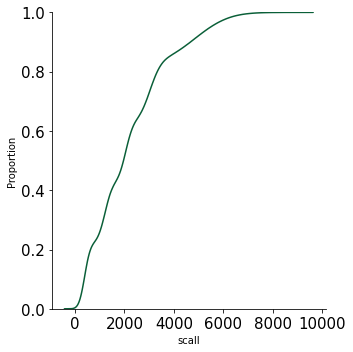

In [21]:
import seaborn as sns
sns.displot(feature_1, color='#0a5f38', kind='ecdf');

# Binomial

In [22]:
# np.random.binomial?

(0.51, 0.4998999899979995)

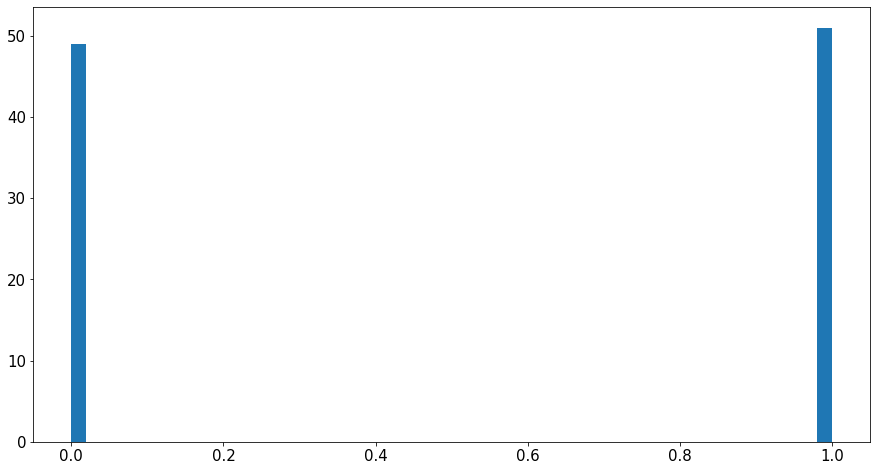

In [23]:
n = 1
# n = 1000
p = 0.5
sample = np.random.binomial(n, p, size=100)
plt.hist(sample, bins=50, range=(0, n));
sample.mean(), sample.std()


(497.8, 16.789282295559865)

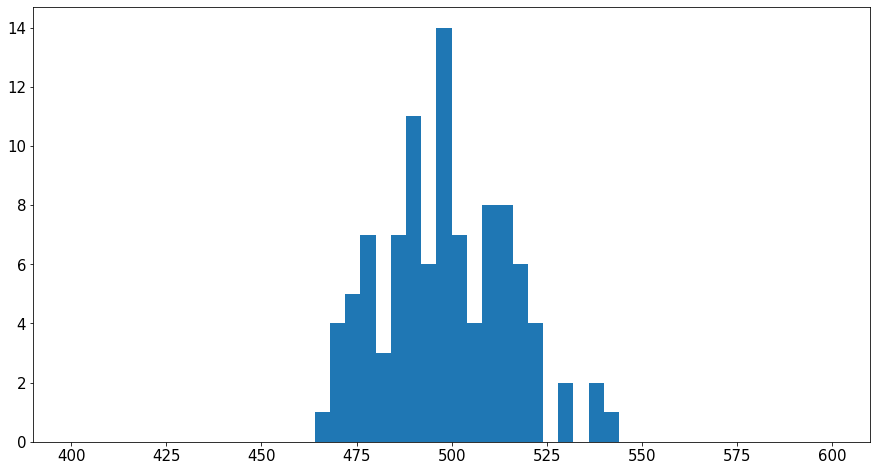

In [24]:
n = 1
n = 1000
p = 0.5
offset = 400
# offset = 0
sample = np.random.binomial(n, p, size=100)
plt.hist(sample, bins=50, range=(offset, n-offset));
sample.mean(), sample.std()

# Poisson

In [25]:
# np.random.poisson?

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

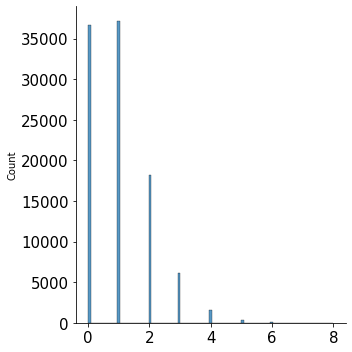

In [26]:
# https://en.wikipedia.org/wiki/Poisson_distribution
x = np.random.poisson(lam=1, size=100_000)
# x = np.random.poisson(lam=4, size=100_000)
# x = np.random.poisson(lam=10, size=100_000)
sns.displot(x, kind='hist')
# sns.displot(x, kind='ecdf')
np.unique(x)

# Skewed normal

https://en.m.wikipedia.org/wiki/Skew_normal_distribution

In [27]:
from scipy.stats import skewnorm

In [28]:
skewnorm.rvs?

(50.02104903621307, 274.3639644981216, 135.75968986382145)

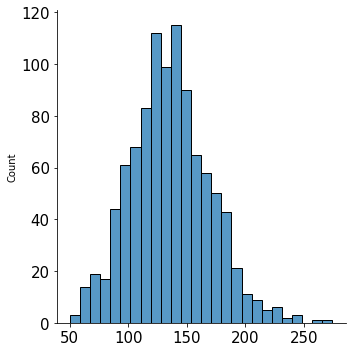

In [29]:
alpha = 2 # alpha, shape
r = skewnorm.rvs(a=alpha, size=1000, loc=100, scale=50.0)
sns.displot(r)
r.min(), r.max(), r.mean()

# Survival / Weibull

https://en.wikipedia.org/wiki/Weibull_distribution


In [30]:
# np.random.weibull?

(2.7224193689817344e-05, 12.865754998908761, 1.004181786396394)

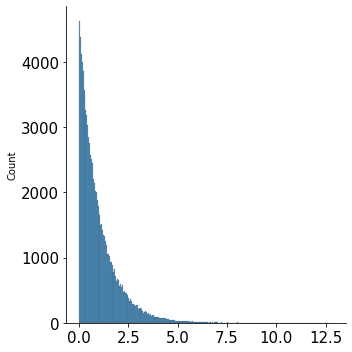

In [31]:
k = 1
x = np.random.weibull(a=k, size=100_000)
sns.displot(x)
x.min(), x.max(), x.mean()

# Transformation (wip)

In [32]:
# x = np.random.uniform(16, 100, size=n_samples)
x = np.random.uniform(16, 100, size=100)
x.sort()
x

array([20.54494675, 21.31339018, 22.08934484, 22.30370321, 23.28325408,
       24.72054304, 25.80297792, 26.43760443, 26.93736625, 26.9844573 ,
       27.65474806, 27.79222444, 27.93179754, 28.00715862, 29.05415475,
       29.35897131, 30.05590533, 31.09230336, 31.2953849 , 33.13060332,
       34.4862352 , 35.41158517, 35.6764864 , 37.63792705, 37.64463324,
       39.42724829, 39.47450691, 41.49711024, 41.67750096, 43.42051735,
       43.91721   , 45.76513528, 45.79446686, 46.16168539, 47.85056099,
       47.90288599, 48.21550499, 48.95043894, 50.22276882, 52.65228001,
       53.16168445, 53.74841508, 55.68665667, 55.77467585, 57.58981636,
       57.7155275 , 59.54376844, 59.8791063 , 60.06726358, 60.42851394,
       60.78164053, 61.20968389, 62.10145398, 62.12391093, 64.38547921,
       64.60326369, 67.44477498, 68.72587166, 69.03036444, 69.2953972 ,
       69.71019873, 70.94163799, 71.11269493, 71.44510109, 71.51004124,
       71.92938911, 72.19535309, 73.14493862, 74.1511621 , 74.36

In [33]:
from scipy.stats import norm

In [34]:
# norm.pdf?

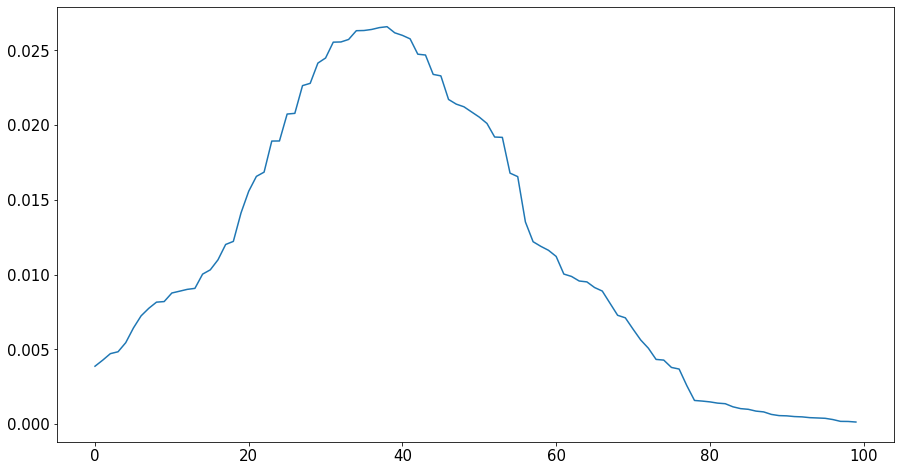

In [36]:
y_pdf = norm.pdf(x,50,15)
plt.plot(y_pdf)
# sns.displot(y_pdf);
# y_pdf.shape